In [1]:
%matplotlib inline

/Users/Lehner/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


# Facial Recognition Using Eigenfaces

This notebook contains a simple facial recognition program created for on of my applied math labs. It uses the **faces94** dataset.

In [2]:
import numpy as np
from scipy import linalg as la
from os import walk
from scipy.ndimage import imread
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import random

### Load Faces Dataset
The first thing that I do is load all of the faces. This code searches through the passed directory and finds all of the JPEG images, flattenes and stores them in a matrix.

In [3]:
def getFaces(path='faces94'):
    """Traverse the directory specified by 'path' and return an array containing
    one column vector per subdirectory.
    """
    # Traverse the directory and get one image per subdirectory
    faces = []
    for (dirpath, dirnames, filenames) in walk(path):
        for f in filenames:
            if f[-3:]=="jpg": # only get jpg images
                # load image, convert to grayscale, flatten into vector
                face = imread(dirpath+"/"+f).mean(axis=2).ravel()
                faces.append(face)
                break
    # put all the face vectors column-wise into a matrix
    return np.array(faces).T

### Show an image
This is a function that takes a flattened image and displays it.

In [4]:
def show(im, w=200, h=180):
    """Plot the flattened grayscale image 'im' of width 'w' and height 'h'."""
    plt.imshow(im.reshape((w,h)), cmap=cm.Greys_r)
    plt.show()

This is a similar function that displays two images side-by-side.

In [5]:
def show2(test_image, result, w=200, h=180):
    """Convenience function for plotting two flattened grayscale images of
    the specified width and height side by side
    """
    plt.subplot(121)
    plt.title("Inputed Image")
    plt.imshow(test_image.reshape((w,h)), cmap=cm.Greys_r)
    plt.axis("off")
    plt.subplot(122)
    plt.title("Closest Match")
    plt.imshow(result.reshape((w,h)), cmap=cm.Greys_r)
    plt.axis("off")
    plt.show()

### Performing a Mean Shift on the Faces
#### Calculate the Mean Face
To identify the unique attributes of each face, we want to first calculate the mean face.


In [6]:
class FacialRec:
    ##########Members##########
    #   F, mu, Fbar, and U
    ###########################
    def __init__(self,path):
        self.initFaces(path)
        self.initMeanImage()
        self.initDifferences()
        self.initEigenfaces()
    def initFaces(self, path):
        self.F = getFaces(path)
    def initMeanImage(self):
        self.mu = np.mean(self.F, axis = 1)
    def initDifferences(self):
        mn, k = self.F.shape
        self.Fbar = self.F - np.tile(np.reshape(self.mu, (len(self.mu), 1)), k)
    def initEigenfaces(self):
        self.U, s, Vt = la.svd(self.Fbar, full_matrices=False)
    def project(self, A, s=38):
        return np.dot(self.U.T, A)
    def findNearest(self, image, s=38):
        Fhat = self.project(self.Fbar)
        ghat = self.project(image - self.mu)
        mn, k = Fhat.shape
        min_column = 0
        for i in xrange(1,k):
            if np.linalg.norm(Fhat[:,i] - ghat) < np.linalg.norm(Fhat[:,min_column] - ghat):
                min_column = i
        return min_column

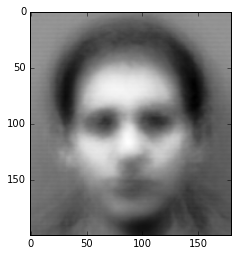

In [7]:
def problem2():
    faces = FacialRec('../Vim/faces94')
    faces.initMeanImage()
    show(faces.mu)
problem2()

#### Mean Shifted Face

In order to see the unique attributes of an individual image, we subtract that image from the mean face giving us a shifted mean face.

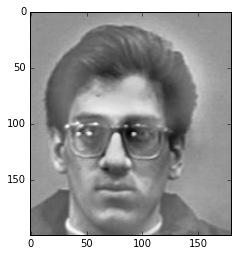

In [8]:
def problem3():
    faces = FacialRec('../Vim/faces94')
    faces.initDifferences()
    show(faces.Fbar[:,28])
problem3()

#### Eigenfaces

Similarly we can use the eigenvalues of the faces in order to find the eigenfaces, another tool to help us identify the prominent features of an image and thus assisting in identifying the individual imaged. 

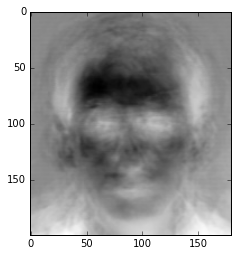

In [9]:
def problem4():
    faces = FacialRec('../Vim/faces94')
    faces.initEigenfaces()
    show(faces.U[:,0])
problem4()
    

### Summary
After this code is written, the methods are displayed by testing them on random images.

In [10]:
def sampleFaces(n_tests, path="../Vim/faces94"):
    """Return an array containing a sample of n_tests images contained
    in the path as flattened images in the columns of the output
    """
    files = []
    for (dirpath, dirnames, filenames) in walk(path):
        for f in filenames:
            if f[-3:]=="jpg": # only get jpg images
                files.append(dirpath+"/"+f)

    #Get a sample of the images
    test_files = random.sample(files, n_tests)
    #Flatten and average the pixel values
    images = np.array([imread(f).mean(axis=2).ravel() for f in test_files]).T
    return images

test_images = sampleFaces(5)


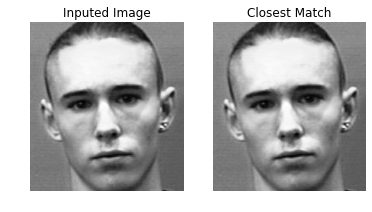

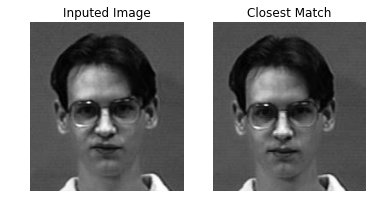

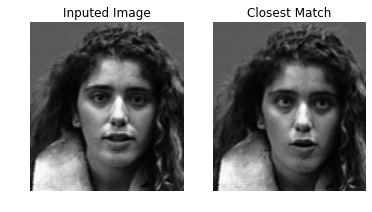

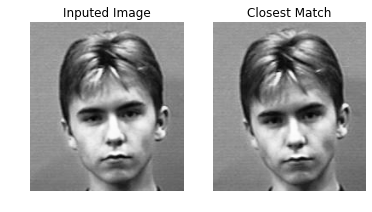

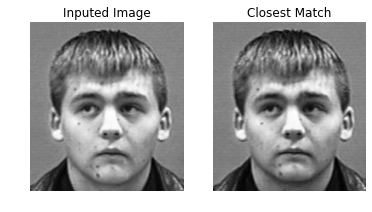

In [11]:
def test():
    faces = FacialRec('../Vim/faces94')
    for image in test_images.T:
        idx = faces.findNearest(image)
        show2(image, faces.F[:,idx])

test()